<a href="https://colab.research.google.com/github/TianyuWu-Henry/Crypto-Lab-Resources/blob/master/Ampleforth_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# October 12-18 Assignment:


*   Simulate MP outcomes given the historical data of AMPL
*   Create visualization to seek for and implement the optimal trading strategy



# STEP 1: Import Data

In [49]:
import pandas as pd
urlAMPL = 'https://raw.githubusercontent.com/williamzhao01123/crypto-lab/master/Data/Ampleforth.csv'
AMPL = pd.read_csv(urlAMPL)
AMPL

,Unnamed: 0,snapped_at,price,market_cap,total_volume,circulating_supply,date
0,0,2019-06-29 00:00:00 UTC,1.995927,9.218437e+06,1.544874e+06,4.618624e+06,2019-06-29
1,1,2019-06-30 00:00:00 UTC,2.088133,9.642670e+06,3.647059e+05,4.617842e+06,2019-06-30
2,2,2019-07-01 00:00:00 UTC,1.927304,9.195160e+06,2.997094e+05,4.770995e+06,2019-07-01
3,3,2019-07-02 00:00:00 UTC,1.892318,9.241390e+06,1.024026e+05,4.883634e+06,2019-07-02
4,4,2019-07-03 00:00:00 UTC,1.613366,8.065828e+06,2.002426e+05,4.999378e+06,2019-07-03
...,...,...,...,...,...,...,...
456,456,2020-09-27 00:00:00 UTC,0.704852,1.081441e+08,4.274102e+06,1.534281e+08,2020-09-27
457,457,2020-09-28 00:00:00 UTC,0.687545,1.012762e+08,4.519696e+06,1.473012e+08,2020-09-28
458,458,2020-09-29 00:00:00 UTC,0.659388,9.854553e+07,6.183493e+06,1.494499e+08,2020-09-29
459,459,2020-09-30 00:00:00 UTC,0.640566,9.305995e+07,3.818957e+06,1.452776e+08,2020-09-30


In [50]:
# Observe the changing trend of the price of AMPL
import plotly.express as px
def linevis(x, measure):
  fig = px.line(x, x = 'date', y = measure)
  fig.show()
linevis(AMPL, 'price')

# STEP 2: Design Simulation Function


## Simulation:

Considering the rebase given by the change of AMPL price, we will modify client's holdings (the amount of AMPL) before transaction.

In [51]:
num = AMPL.shape[0]

In [52]:
def simulation(mplow, mphigh):
  cash = 1000
  holding = 0

  for index in range(186):
    mpmkt = AMPL['price'][index]
    # rebase function
    if mpmkt > 1.05:
      holding = (1 + (mpmkt - 1) / 10) * holding
      if mpmkt < mplow:
        holding = holding + cash / mpmkt
        cash = 0
      if mpmkt > mphigh:
        cash = cash + holding * mpmkt
        holding = 0
    elif mpmkt < 0.95:
      holding = (1 - (1 - mpmkt) / 10) * holding
      if mpmkt < mplow:
        holding = holding + cash / mpmkt
        cash = 0
      if mpmkt > mphigh:
        cash = cash + holding * mpmkt
        holding = 0
    else:
      if mpmkt < mplow:
        holding = holding + cash / mpmkt
        cash = 0
      if mpmkt > mphigh:
        cash = cash + holding * mpmkt
        holding = 0
  for index in range(186, num):
    if mpmkt > 1.06:
      holding = (1 + (mpmkt - 1) / 10) * holding
      if mpmkt < mplow:
        holding = holding + cash / mpmkt
        cash = 0
      if mpmkt > mphigh:
        cash = cash + holding * mpmkt
        holding = 0
    elif mpmkt < 0.96:
      holding = (1 - (1 - mpmkt) / 10) * holding
      if mpmkt < mplow:
        holding = holding + cash / mpmkt
        cash = 0
      if mpmkt > mphigh:
        cash = cash + holding * mpmkt
        holding = 0
    else:
      if mpmkt < mplow:
        holding = holding + cash / mpmkt
        cash = 0
      if mpmkt > mphigh:
        cash = cash + holding * mpmkt
        holding = 0
  outcome = cash + holding * mpmkt
  return(outcome)

## Generating results with different strategies


In [53]:
mplow = 0.01
mphigh = 0.02
low = []
high = []
outcome = []

while mphigh < 3.99:
  while mplow < mphigh:
    high.append(mphigh)
    low.append(mplow)
    outcome.append(simulation(mplow, mphigh))
    mplow = mplow + 0.01
  mphigh = mphigh + 0.01
  mplow = 0.01

data = {'mplow':low, 'mphigh':high, 'outcome': outcome}
df = pd.DataFrame(data)
print(df)

       mplow  mphigh      outcome
0       0.01    0.02  1000.000000
1       0.01    0.03  1000.000000
2       0.02    0.03  1000.000000
3       0.01    0.04  1000.000000
4       0.02    0.04  1000.000000
...      ...     ...          ...
79396   3.94    3.99    10.472517
79397   3.95    3.99    10.472517
79398   3.96    3.99    10.472517
79399   3.97    3.99    10.472517
79400   3.98    3.99    10.472517

[79401 rows x 3 columns]


# STEP 3: Generating visualization


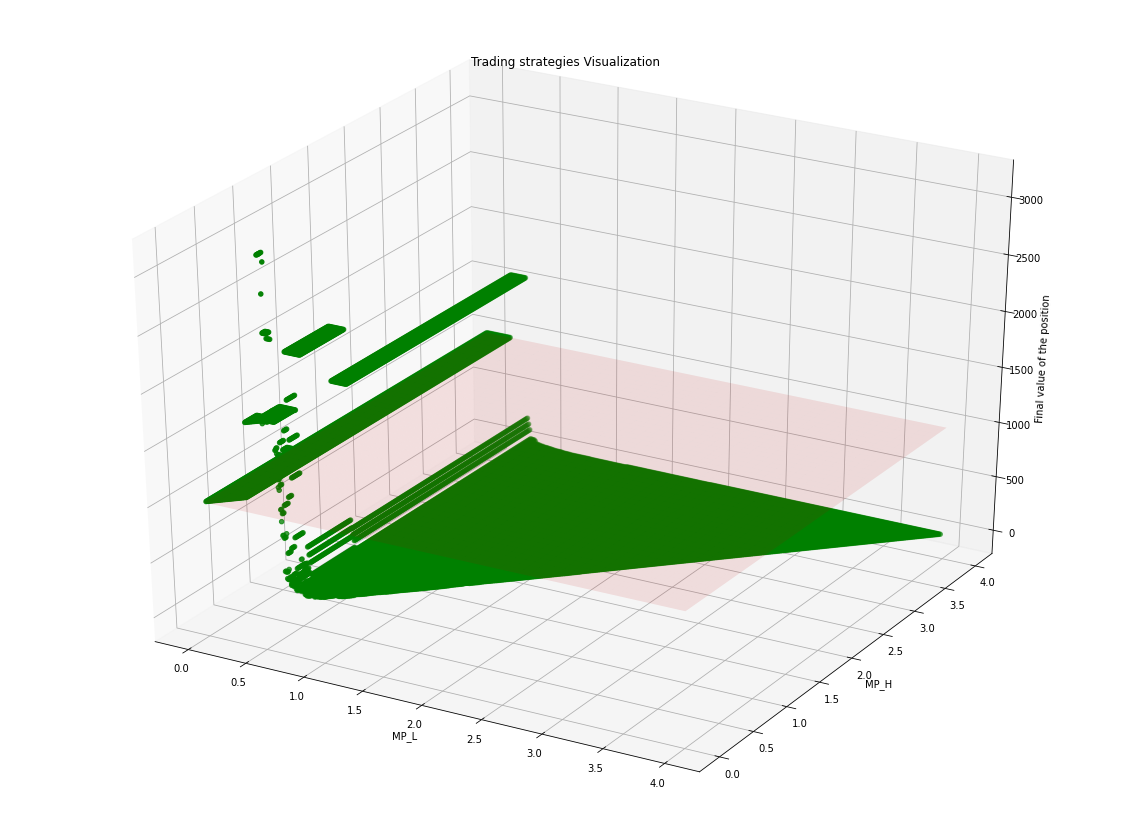

In [63]:
import numpy as np
import matplotlib.pyplot as plt

df['sign'] = np.sign(df['outcome'])


fig = plt.figure(figsize=(20,15))
ax = plt.axes(projection ="3d")

ax.set_xlabel('MP_L')
ax.set_ylabel('MP_H')
ax.set_zlabel('Final value of the position')

# print the estimation result
ax.scatter3D(df['mplow'], df['mphigh'], df['outcome'], color = 'green')
plt.title("Trading strategies Visualization")

# print the baseline
X = np.arange(0, 4, 0.01)
Y = np.arange(0, 4, 0.01)
X, Y = np.meshgrid(X, Y)
Z = np.sqrt(X * Y * 0 + 1000000)

ax.plot_surface(X, Y, Z, alpha = 0.1, color = 'red')

# show plot
plt.show()

In [61]:
df.idxmax()

mplow      79400
mphigh     79003
outcome      560
sign           0
dtype: int64

In [62]:
df.idxmin()

mplow         0
mphigh        0
outcome    9712
sign          0
dtype: int64